In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import sklearn
import pickle
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [35]:
raw_data = pd.read_csv("student-mat.csv", sep = ";")

In [36]:
raw_data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [37]:
data = raw_data[["G1","G2","G3","absences", "failures", "studytime","freetime","famsup"]]

In [38]:
data.head()

,G1,G2,G3,absences,failures,studytime,freetime,famsup
0,5,6,6,6,0,2,3,no
1,5,5,6,4,0,2,3,yes
2,7,8,10,10,3,2,3,no
3,15,14,15,2,0,3,2,yes
4,6,10,10,4,0,2,3,yes


Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


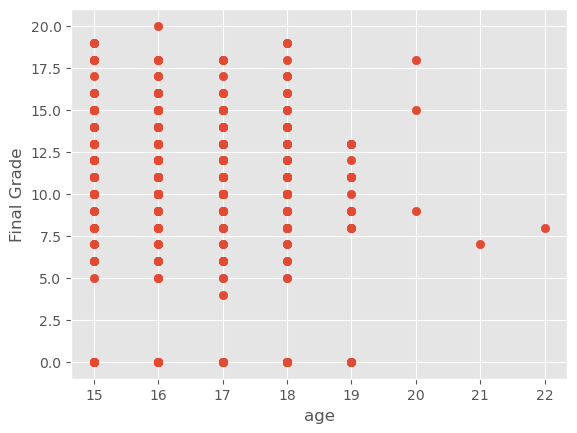

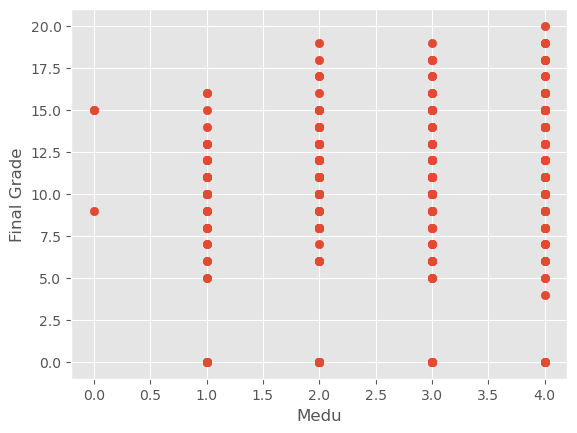

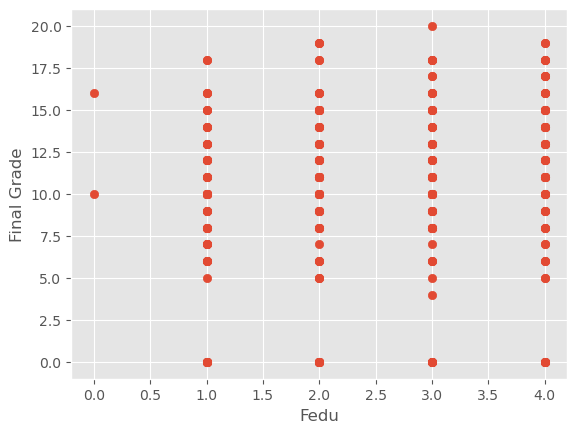

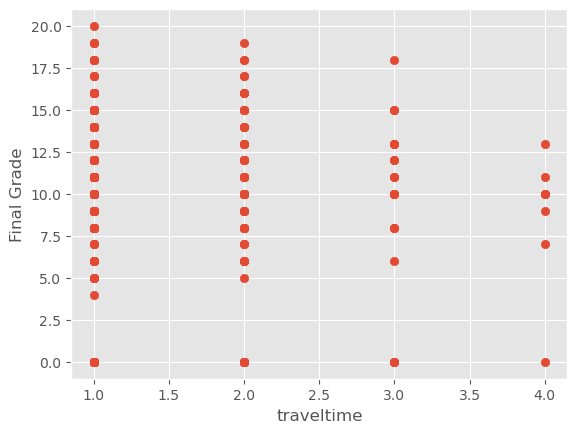

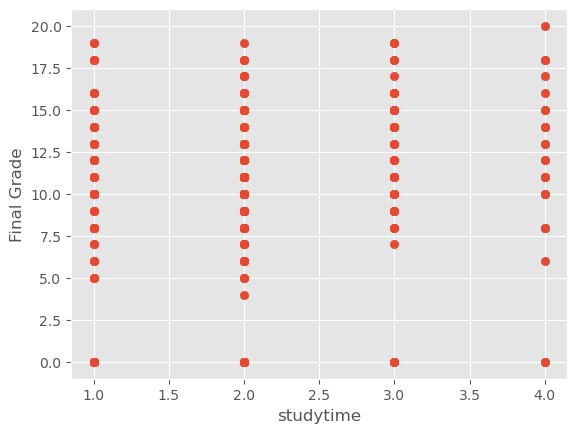

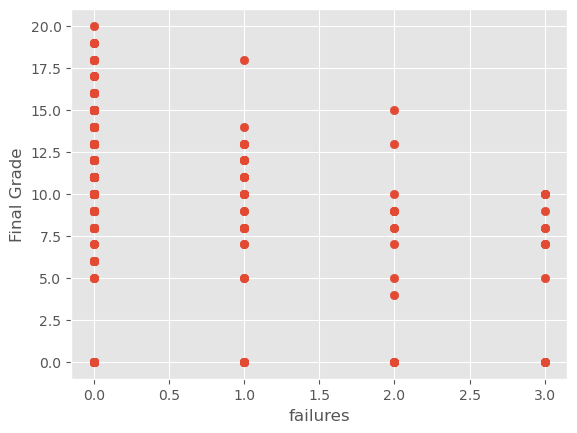

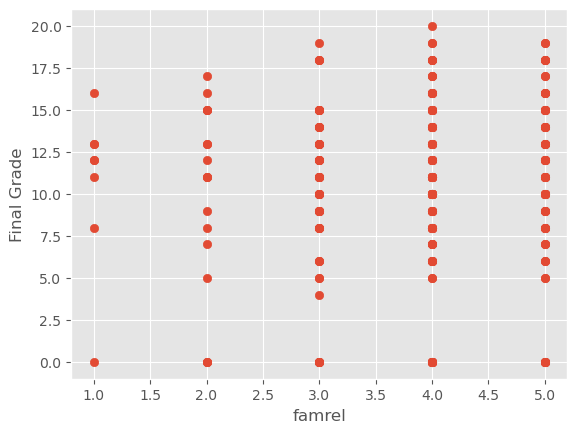

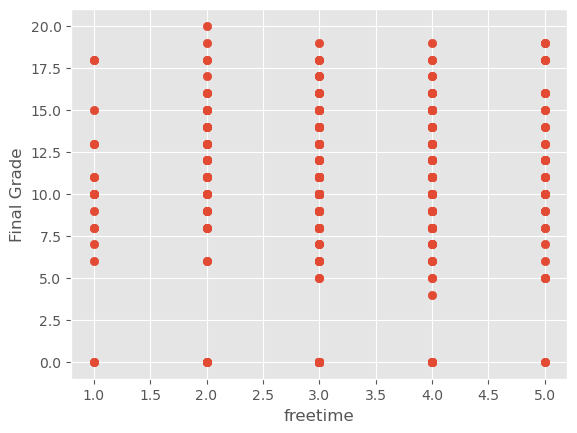

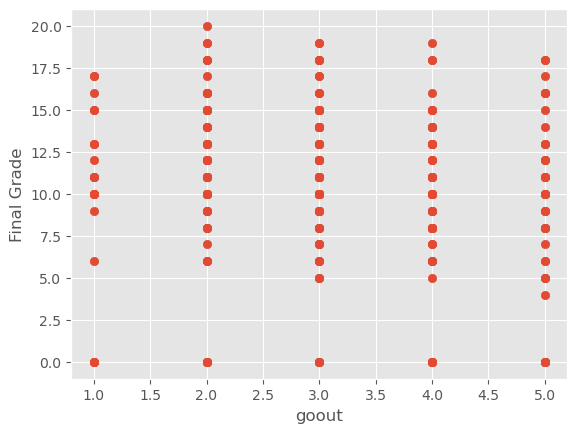

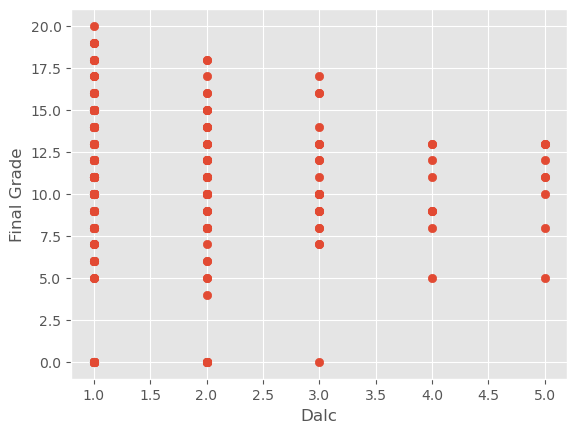

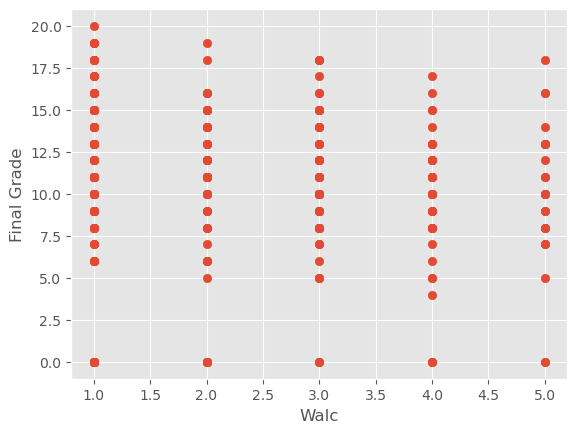

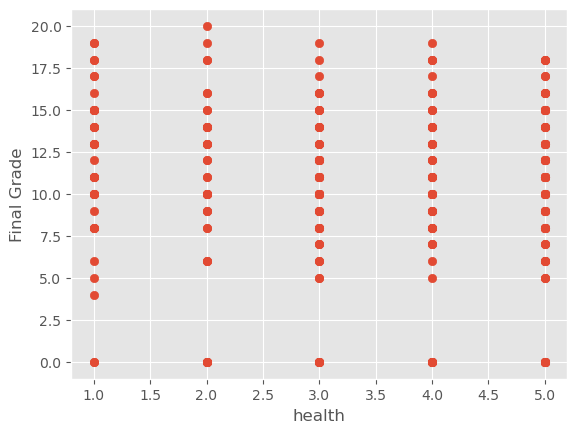

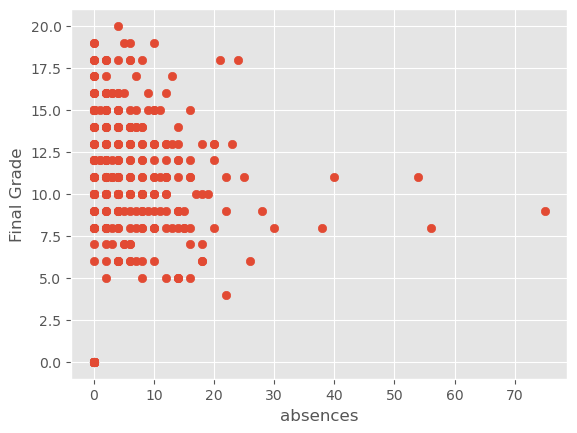

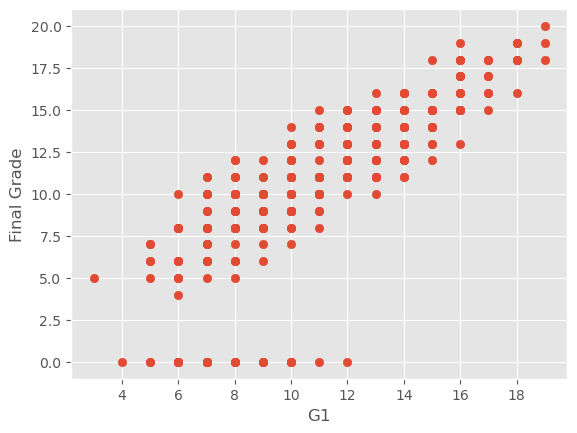

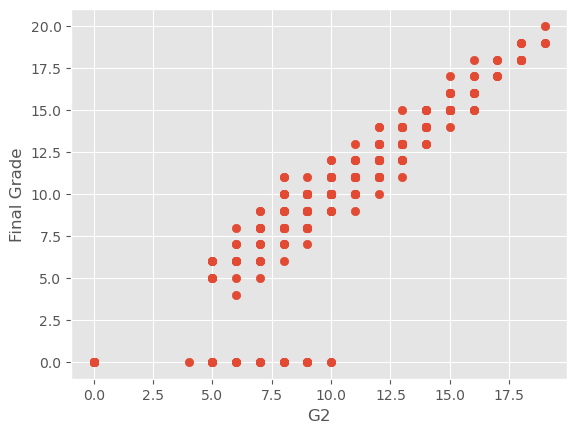

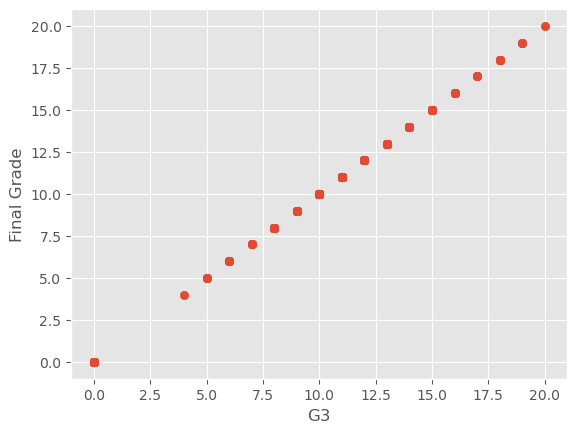

In [77]:
style.use("ggplot")
num_cols = raw_data.select_dtypes(include = ["int64","float64"]).columns
print(num_cols)
for col in num_cols:
    plot = col # Change this to G1, G2, studytime or absences to see other graphs
    plt.scatter(raw_data[plot], raw_data["G3"]) 
    plt.xlabel(plot)
    plt.ylabel("Final Grade")
    plt.show()

In [39]:
encoder = LabelEncoder()

In [68]:
data["famsup"] = encoder.fit_transform(data["famsup"])

C:\Users\imrav\AppData\Local\Temp\ipykernel_8\3151450031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["famsup"] = encoder.fit_transform(data["famsup"])


In [69]:
data.head()

,G1,G2,G3,absences,failures,studytime,freetime,famsup
0,5,6,6,6,0,2,3,0
1,5,5,6,4,0,2,3,1
2,7,8,10,10,3,2,3,0
3,15,14,15,2,0,3,2,1
4,6,10,10,4,0,2,3,1


In [70]:
predict = "G3"

In [71]:
X = np.array(data.drop("G3",axis = 1))

In [72]:
y = np.array(data[predict])

In [73]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size = 0.1,random_state = 97)
linear = linear_model.LinearRegression()
linear.fit(x_train,y_train)
acc = linear.score(x_test, y_test)
print(acc)
print(f"Coeficients: \n{linear.coef_}")
print(f"Intercept: \n{linear.intercept_}")
with open("studentmodel.pickle", "wb") as  f:
    pickle.dump(linear,f)


0.9431748929261176
Coeficients: 
[ 0.13736819  0.9966715   0.04577349 -0.34117234 -0.19262096  0.11617143
  0.17170288]
Intercept: 
-2.0241327397154727


In [74]:
predictions = linear.predict(x_test)
for i in range(len(predictions)):
    print(predictions[i], x_test[i], y_test[i])

15.13282893178944 [15 15  4  0  2  3  0] 15
8.10163035153042 [7 9 2 1 1 4 1] 8
11.53881453039441 [12 11 16  1  1  5  1] 12
11.134560928943811 [11 11 12  0  2  3  1] 11
15.020085195088235 [14 15  2  0  2  4  0] 15
4.052231708140187 [ 6  5 16  3  1  5  1] 5
13.54906610169759 [15 14  4  2  3  4  1] 15
11.263678942674895 [12 12  1  0  4  2  1] 12
14.053718821456641 [11 12 54  0  2  3  1] 11
12.420787566051095 [12 12 14  0  2  5  0] 12
7.579228123737781 [7 9 6 2 2 4 0] 8
7.9588797440675005 [8 9 4 0 2 1 0] 10
14.021454173263113 [12 14  0  0  1  4  1] 15
11.5515301665241 [13 12  2  1  2  4  0] 12
16.175321651545914 [16 16  2  0  2  3  0] 17
7.539542214607646 [ 7  8 12  0  2  4  0] 8
6.242559463628179 [ 7  6 26  0  2  3  1] 6
3.964134899478667 [5 5 4 0 2 3 1] 6
16.62518859926087 [17 16  0  0  2  5  1] 16
13.815878516041016 [13 14  6  0  3  2  1] 14
13.656227662238967 [15 13  9  0  2  4  1] 15
12.828734029505966 [13 13  2  0  2  2  1] 13
16.165890107798436 [18 16  0  0  3  3  0] 16
15.466524453

In [75]:
with open("studentmodel.pickle","rb") as f:
    model = pickle.load(f)

In [76]:
acc = model.score(x_test, y_test)
print(acc)

0.9431748929261176


In [66]:
data.columns

Index(['G1', 'G2', 'G3', 'absences', 'failures', 'studytime', 'freetime',
       'famsup'],
      dtype='object')

In [67]:
raw_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object